In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [118]:
#Get data from the CSV file:
Covid_data = pd.read_csv('covid_19_data.csv')
Covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [119]:
# Lets describe the dataframe:
Covid_data.describe()

,SNo,Confirmed,Deaths,Recovered
count,59759.000000,59759.000000,59759.000000,59759.000000
mean,29880.000000,9307.219113,530.849613,4035.499322
std,17251.081705,29341.110695,2468.054414,22713.450487
min,1.000000,0.000000,0.000000,0.000000
25%,14940.500000,87.000000,1.000000,0.000000
50%,29880.000000,839.000000,13.000000,98.000000
75%,44819.500000,4579.500000,144.000000,1179.000000
max,59759.000000,405843.000000,41128.000000,953420.000000


In [120]:
# Letz get some specifics for the data:
print("Shape of the data:",Covid_data.shape)
print("Check for null values and print the count :\n",Covid_data.isnull().sum())
print("Get the datatype for each columns:\n",Covid_data.dtypes)

Shape of the data: (59759, 8)
Check for null values and print the count :
 SNo                    0
ObservationDate        0
Province/State     22409
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Get the datatype for each columns:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [121]:
# Letz start Analysing the dataset
#First we will drop the Serial No.
Covid_data = Covid_data.drop(['SNo'],axis = 1)
Covid_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
59754,07/08/2020,Zacatecas,Mexico,2020-07-09 04:34:23,1212.0,128.0,791.0
59755,07/08/2020,Zakarpattia Oblast,Ukraine,2020-07-09 04:34:23,3533.0,121.0,1117.0
59756,07/08/2020,Zaporizhia Oblast,Ukraine,2020-07-09 04:34:23,599.0,18.0,464.0
59757,07/08/2020,Zhejiang,Mainland China,2020-07-09 04:34:23,1269.0,1.0,1267.0


In [122]:
# Letz convert ObservationDate to Date time, which can be utilized for analysing
Covid_data['ObservationDate'] = pd.to_datetime(Covid_data['ObservationDate'])
Covid_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
59754,2020-07-08,Zacatecas,Mexico,2020-07-09 04:34:23,1212.0,128.0,791.0
59755,2020-07-08,Zakarpattia Oblast,Ukraine,2020-07-09 04:34:23,3533.0,121.0,1117.0
59756,2020-07-08,Zaporizhia Oblast,Ukraine,2020-07-09 04:34:23,599.0,18.0,464.0
59757,2020-07-08,Zhejiang,Mainland China,2020-07-09 04:34:23,1269.0,1.0,1267.0


In [123]:
# Letz group the Country along with ObservationDate
Grouped_Countries = Covid_data.groupby(['Country/Region','ObservationDate']).agg({"Confirmed":'sum',"Deaths":'sum',"Recovered":'sum'})
Grouped_Countries.sort_values(by='Confirmed',ascending = False)

Confirmed    Deaths  Recovered
Country/Region                 ObservationDate                                
US                             2020-07-08       3054699.0  132300.0   953420.0
                               2020-07-07       2996098.0  131480.0   936476.0
                               2020-07-06       2936077.0  130285.0   924148.0
                               2020-07-05       2888635.0  129947.0   906763.0
                               2020-07-04       2839436.0  129676.0   894325.0
...                                                   ...       ...        ...
Hong Kong                      2020-01-22             0.0       0.0        0.0
Guernsey                       2020-03-20             0.0       0.0        0.0
Brazil                         2020-01-23             0.0       0.0        0.0
Guernsey                       2020-03-19             0.0       0.0        0.0
occupied Palestinian territory 2020-03-17             0.0       0.0        0.0

[24201 rows x 3 columns]

In [124]:
Grouped_Countries['Active Cases'] = Grouped_Countries['Confirmed'] - Grouped_Countries['Deaths'] - Grouped_Countries['Recovered']
Grouped_Countries['log_confirmed'] = np.log(Grouped_Countries['Confirmed'])
Grouped_Countries['log_active'] = np.log(Grouped_Countries['Active Cases'])
Grouped_Countries

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



Confirmed  Deaths  Recovered  \
Country/Region                 ObservationDate                                 
 Azerbaijan                    2020-02-28             1.0     0.0        0.0   
('St. Martin',)                2020-03-10             2.0     0.0        0.0   
Afghanistan                    2020-02-24             1.0     0.0        0.0   
                               2020-02-25             1.0     0.0        0.0   
                               2020-02-26             1.0     0.0        0.0   
...                                                   ...     ...        ...   
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0   
                               2020-03-14             0.0     0.0        0.0   
                               2020-03-15             0.0     0.0        0.0   
                               2020-03-16             0.0     0.0        0.0   
                               2020-03-17             0.0     0.0        0.0   

                                                Active Cases  log_confirmed  \
Country/Region                 ObservationDate                                
 Azerbaijan                    2020-02-28                1.0       0.000000   
('St. Martin',)                2020-03-10                2.0       0.693147   
Afghanistan                    2020-02-24                1.0       0.000000   
                               2020-02-25                1.0       0.000000   
                               2020-02-26                1.0       0.000000   
...                                                      ...            ...   
occupied Palestinian territory 2020-03-12                0.0           -inf   
                               2020-03-14                0.0           -inf   
                               2020-03-15                0.0           -inf   
                               2020-03-16                0.0           -inf   
                               2020-03-17                0.0           -inf   

                                                log_active  
Country/Region                 ObservationDate              
 Azerbaijan                    2020-02-28         0.000000  
('St. Martin',)                2020-03-10         0.693147  
Afghanistan                    2020-02-24         0.000000  
                               2020-02-25         0.000000  
                               2020-02-26         0.000000  
...                                                    ...  
occupied Palestinian territory 2020-03-12             -inf  
                               2020-03-14             -inf  
                               2020-03-15             -inf  
                               2020-03-16             -inf  
                               2020-03-17             -inf  

[24201 rows x 6 columns]

# Now letz analyse datewise

In [125]:
datewise = Covid_data.groupby(['ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Active Cases"] = datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"]
datewise["Days Since"] = datewise.index - datewise.index.min()
datewise

,Confirmed,Recovered,Deaths,Active Cases,Days Since
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,510.0,0 days
2020-01-23,653.0,30.0,18.0,605.0,1 days
2020-01-24,941.0,36.0,26.0,879.0,2 days
2020-01-25,1438.0,39.0,42.0,1357.0,3 days
2020-01-26,2118.0,52.0,56.0,2010.0,4 days
...,...,...,...,...,...
2020-07-04,11267309.0,6059565.0,530754.0,4676990.0,164 days
2020-07-05,11449707.0,6179006.0,534267.0,4736434.0,165 days
2020-07-06,11620096.0,6302626.0,538058.0,4779412.0,166 days


In [126]:
print("Letz look into basic informations:")
print("Total number of countries with Disease spread", len(Covid_data['Country/Region'].unique()))
print("Total number of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of deaths around the world due to COVID-19",datewise["Deaths"].iloc[-1])
print("Total number of active cases around the world ",datewise["Active Cases"].iloc[-1])
print("Total number of closed cases around the world ",datewise["Confirmed"].iloc[-1]-datewise["Active Cases"].iloc[-1])
print("An approximate number of confirmed cases per day around the world ",np.round(datewise["Confirmed"].iloc[-1]/len(datewise)))
print("An approximate number of Recovered cases per day around the world",np.round(datewise["Recovered"].iloc[-1]/len(datewise)))
print("An approximate number of Death cases per day around the world",np.round(datewise["Deaths"].iloc[-1]/len(datewise)))
print("An approximate number of confirmed cases per hour around the world",np.round(datewise["Confirmed"].iloc[-1]/(len(datewise)*24)))
print("An approximate number of Recovered cases per hour around the world",np.round(datewise["Recovered"].iloc[-1]/(len(datewise)*24)))
print("An approximate number of Death cases per hour around the world", np.round(datewise["Deaths"].iloc[-1]/(len(datewise)*24)))
print("Number of confirmed case in last 24 hours:",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of confirmed case in last 24 hours:",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of confirmed case in last 24 hours:",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Letz look into basic informations:
Total number of countries with Disease spread 223
Total number of confirmed cases around the world 12041480.0
Total number of recovered cases around the world 6586726.0
Total number of deaths around the world due to COVID-19 549468.0
Total number of active cases around the world  4905286.0
Total number of closed cases around the world  7136194.0
An approximate number of confirmed cases per day around the world  71251.0
An approximate number of Recovered cases per day around the world 38975.0
An approximate number of Death cases per day around the world 3251.0
An approximate number of confirmed cases per hour around the world 2969.0
An approximate number of Recovered cases per hour around the world 1624.0
An approximate number of Death cases per hour around the world 135.0
Number of confirmed case in last 24 hours: 211878.0
Number of confirmed case in last 24 hours: 139070.0
Number of confirmed case in last 24 hours: 5305.0


In [150]:
fig = px.bar(x=datewise.index,y = datewise["Active Cases"])
fig.update_layout(title = "Distribution of No. of Active cases with respect to Months",xaxis_title="Date",
                  yaxis_title="Number of Active Cases")
fig.show()

In [128]:
fig2 = px.bar(x=datewise.index,y = datewise["Confirmed"] - datewise["Active Cases"])
fig2.update_layout(title = "Distribution of No. of Close cases with respect to Months",xaxis_title="Date",yaxis_title="Number of Active Cases")
fig2.show()

In [129]:
# Letz analyse for United States
US_Data = Covid_data[Covid_data["Country/Region"] == 'US'].copy()
US_Data.reset_index(inplace = True)
US_Data["Active Cases"] = US_Data["Confirmed"] -(US_Data["Deaths"] + US_Data["Recovered"])
US_Data

,index,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active Cases
0,31,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,69,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0,1.0
2,117,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0,1.0
3,118,2020-01-24,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,1.0
4,158,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
7885,59730,2020-07-08,Virginia,US,2020-07-09 04:34:23,67375.0,1905.0,0.0,65470.0
7886,59738,2020-07-08,Washington,US,2020-07-09 04:34:23,37941.0,1394.0,0.0,36547.0
7887,59740,2020-07-08,West Virginia,US,2020-07-09 04:34:23,3707.0,95.0,0.0,3612.0
7888,59742,2020-07-08,Wisconsin,US,2020-07-09 04:34:23,33154.0,807.0,0.0,32347.0


In [130]:
State_US_data = US_Data.groupby(['Province/State']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum',"Active Cases":'sum'}).sort_values(by='Active Cases',ascending = False)

State_US_data

,Confirmed,Recovered,Deaths,Active Cases
Province/State,,,,
New York,32115695.0,0.0,2445517.0,29670178.0
New Jersey,13146944.0,2.0,924638.0,12222304.0
California,10362901.0,40.0,335554.0,10027307.0
Illinois,8818113.0,16.0,403702.0,8414395.0
Massachusetts,7636601.0,8.0,507766.0,7128827.0
...,...,...,...,...
"Shasta County, CA",1.0,0.0,0.0,1.0
"Montgomery County, TX",0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0


In [131]:
y_label = State_US_data[0:20]#State_US_data['Confirmed']>1000]
#y_label
#State_US_data.index[0:20]
fig4 = px.bar(x = State_US_data.index[0:20], y = State_US_data["Active Cases"].iloc[0:20])
fig4.update_layout(title = "Top 20 State Active cases",xaxis_title = "Top 20 States",yaxis_title = "Total No. of Cases")
#px.bar(x = US_Data["Province/State"], y= US_Data["Confirmed"])#- (US_Data['Recovered'] + US_Data['Deaths']))
fig4.show()

In [132]:
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=datewise.index,y = datewise["Confirmed"],mode='lines+markers',name='Confirmed Cases'))
fig5.add_trace(go.Scatter(x=datewise.index,y = datewise["Recovered"],mode='lines+markers',name="Recovered Cases"))
fig5.add_trace(go.Scatter(x=datewise.index,y = datewise["Deaths"],mode='lines+markers',name='Deaths'))
fig5.add_trace(go.Scatter(x=datewise.index,y=datewise["Active Cases"],mode='lines+markers',name='Active Cases'))
fig5.update_layout(title='Distribution of cases wrt Months',xaxis_title='Month',yaxis_title='No. of Cases',legend = dict(x=0,y=1,traceorder='normal'))
fig5.show()

In [133]:
datewise['Closed Cases'] = datewise['Confirmed'] - datewise['Active Cases']
datewise['Mortality Rate'] = (datewise['Deaths']/datewise['Confirmed'])*100
datewise['Recovery Rate'] = (datewise['Recovered']/datewise['Confirmed'])*100
datewise

,Confirmed,Recovered,Deaths,Active Cases,Days Since,Closed Cases,Mortality Rate,Recovery Rate
ObservationDate,,,,,,,,
2020-01-22,555.0,28.0,17.0,510.0,0 days,45.0,3.063063,5.045045
2020-01-23,653.0,30.0,18.0,605.0,1 days,48.0,2.756508,4.594181
2020-01-24,941.0,36.0,26.0,879.0,2 days,62.0,2.763018,3.825717
2020-01-25,1438.0,39.0,42.0,1357.0,3 days,81.0,2.920723,2.712100
2020-01-26,2118.0,52.0,56.0,2010.0,4 days,108.0,2.644004,2.455146
...,...,...,...,...,...,...,...,...
2020-07-04,11267309.0,6059565.0,530754.0,4676990.0,164 days,6590319.0,4.710566,53.780055
2020-07-05,11449707.0,6179006.0,534267.0,4736434.0,165 days,6713273.0,4.666207,53.966499
2020-07-06,11620096.0,6302626.0,538058.0,4779412.0,166 days,6840684.0,4.630409,54.239018


In [134]:
print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Mortality Rate 4.876591929501399
Median Mortality Rate 5.091786752917248
Average Recovery Rate 32.748593159997014
Median Recovery Rate 34.18541061911144


In [135]:
fig6= go.Figure()
fig6.add_trace(go.Scatter(x=datewise.index,y=datewise['Mortality Rate'],mode='lines+markers',name='Mortality Rate'))
fig6.add_trace(go.Scatter(x=datewise.index,y=datewise['Recovery Rate'],mode='lines+markers',name='Recovery Rate'))
fig6.update_layout(title="Mortality Rate vs Recovery Rate",xaxis_title="Months",yaxis_title="Percentage",legend = dict(x=0,y=1,traceorder='normal'))
fig6.show()

In [136]:
print("Average increase in number of confirmed cases (by days:)",datewise['Confirmed'].diff().fillna(0).mean())
print("Average increase in number of recovered cases (by days:)",datewise['Recovered'].diff().fillna(0).mean())
print("Average increase in number of Death cases (by days:)",datewise['Deaths'].diff().fillna(0).mean())
fig7 = go.Figure()
fig7.add_trace(go.Scatter(x=datewise.index,y=datewise['Confirmed'].diff().fillna(0),mode='lines+markers',name='Confirmed Cases(days)'))
fig7.add_trace(go.Scatter(x=datewise.index,y=datewise['Recovered'].diff().fillna(0),mode='lines+markers',name='Recovered Cases(days)'))
fig7.add_trace(go.Scatter(x=datewise.index,y=datewise['Deaths'].diff().fillna(0),mode='lines+markers',name='Deaths Cases(days)'))
fig7.update_layout(title='Daily increase in cases',xaxis_title='Months',yaxis_title='No. of cases',legend=dict(x=0,y=1,traceorder='normal'))
fig7.show()

Average increase in number of confirmed cases (by days:) 71248.07692307692
Average increase in number of recovered cases (by days:) 38974.54437869822
Average increase in number of Death cases (by days:) 3251.189349112426


In [137]:
fig8 = go.Figure()
fig8.add_trace(go.Scatter(x=datewise.index,y=datewise['Confirmed'].diff().rolling(window=7).mean(),mode='lines+markers',name='Confirmed Cases'))
fig8.add_trace(go.Scatter(x=datewise.index,y=datewise['Recovered'].diff().rolling(window=7).mean(),mode='lines+markers',name='Recovered Cases'))
fig8.add_trace(go.Scatter(x=datewise.index,y = datewise['Deaths'].diff().rolling(window=7).mean(),mode='lines+markers',name='Death Cases'))
fig8.update_layout(title='Distribution with respect to 7 days',xaxis_title='Months',yaxis_title='No. of Cases',legend=dict(x=0,y=1,traceorder='normal'))
fig8.show()

Growth Factor


Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

In [138]:
print("Average growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).median())

Average growth factor of number of Confirmed Cases:  1.0655540406993327
Median growth factor of number of Confirmed Cases:  1.024710962630524
Average growth factor of number of Recovered Cases:  1.080868628448917
Median growth factor of number of Recovered Cases:  1.0404390329401614
Average growth factor of number of Death Cases:  1.0674768830995875
Median growth factor of number of Death Cases:  1.0283354658536563


In [139]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0.7,y=1,traceorder="normal"))
fig.show()

In [140]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise['Active Cases']/datewise['Active Cases'].shift()),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["Recovered"]+datewise["Deaths"])/(datewise["Recovered"]+datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0.7,y=1,traceorder="normal"))
fig.show()

Countrywise Analysis

In [141]:
# Letz start analysing with respect to countrywise:
countrywise = Covid_data[Covid_data['ObservationDate']==Covid_data['ObservationDate'].max()].groupby(['Country/Region']).agg({"Confirmed":'sum',"Deaths":'sum',"Recovered":'sum'}).sort_values(by='Confirmed',ascending=False)
countrywise

,Confirmed,Deaths,Recovered
Country/Region,,,
US,3054699.0,132300.0,953420.0
Brazil,1713160.0,67964.0,1139844.0
India,767296.0,21129.0,476378.0
Russia,699749.0,10650.0,471718.0
Peru,312911.0,11133.0,204748.0
...,...,...,...
Saint Kitts and Nevis,16.0,0.0,15.0
Holy See,12.0,0.0,12.0
Papua New Guinea,11.0,0.0,8.0


In [142]:
countrywise['Active Cases'] = countrywise['Confirmed'] - countrywise['Deaths'] - countrywise['Recovered']
countrywise['Mortality'] = np.round((countrywise['Deaths']/countrywise['Confirmed'])*100)
countrywise['Recovered'] = np.round((countrywise['Recovered']/countrywise['Confirmed'])*100)
#grouped_country = countrywise.copy()

In [143]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((Grouped_Countries.loc[country].iloc[-1]-Grouped_Countries.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((Grouped_Countries.loc[country].iloc[-1]-Grouped_Countries.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((Grouped_Countries.loc[country].iloc[-1]-Grouped_Countries.loc[country].iloc[-2])["Deaths"])

In [144]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])
Last_24_Hours_country

,Country Name,Last 24 Hours Confirmed,Last 24 Hours Recovered,Last 24 Hours Deaths
0,US,58601.0,16944.0,820.0
1,Brazil,44571.0,32832.0,1223.0
2,India,24879.0,19547.0,487.0
3,Russia,6534.0,8615.0,172.0
4,Peru,3633.0,3810.0,181.0
...,...,...,...,...
185,Saint Kitts and Nevis,0.0,0.0,0.0
186,Holy See,0.0,0.0,0.0
187,Papua New Guinea,0.0,0.0,0.0
188,Western Sahara,0.0,0.0,0.0


Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

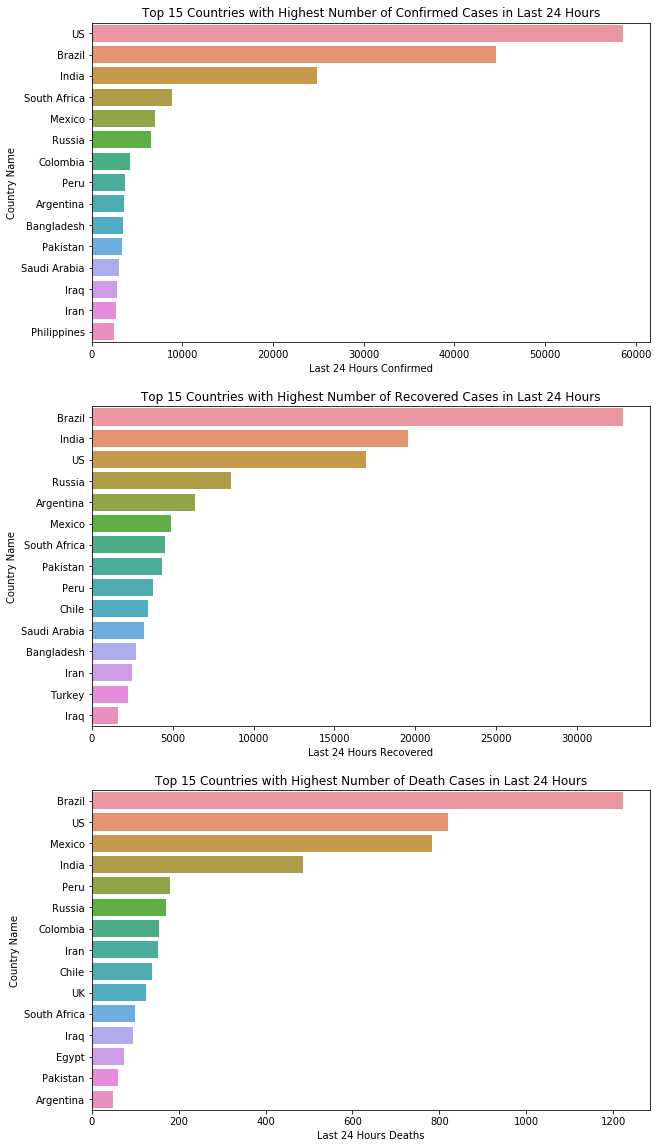

In [145]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
seaborn.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
seaborn.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
seaborn.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

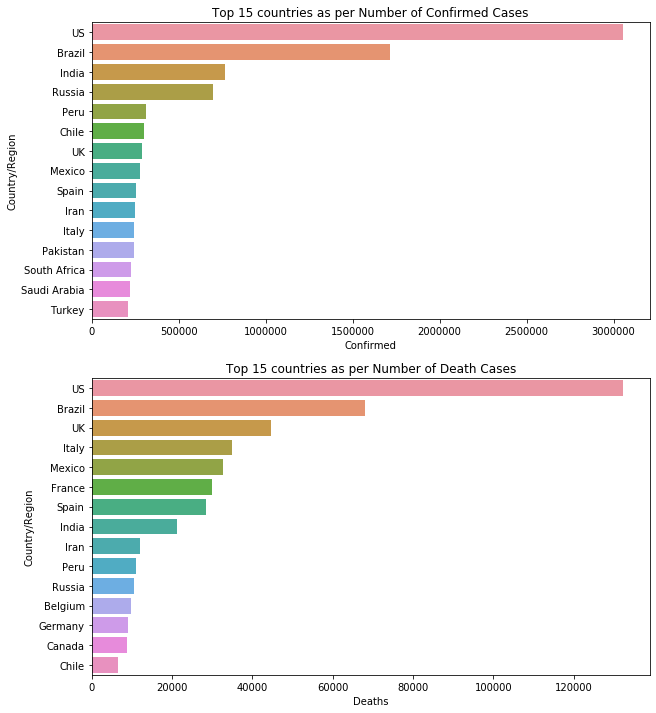

In [146]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
seaborn.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
seaborn.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

Text(0.5, 0, 'Recovery (in Percentage)')

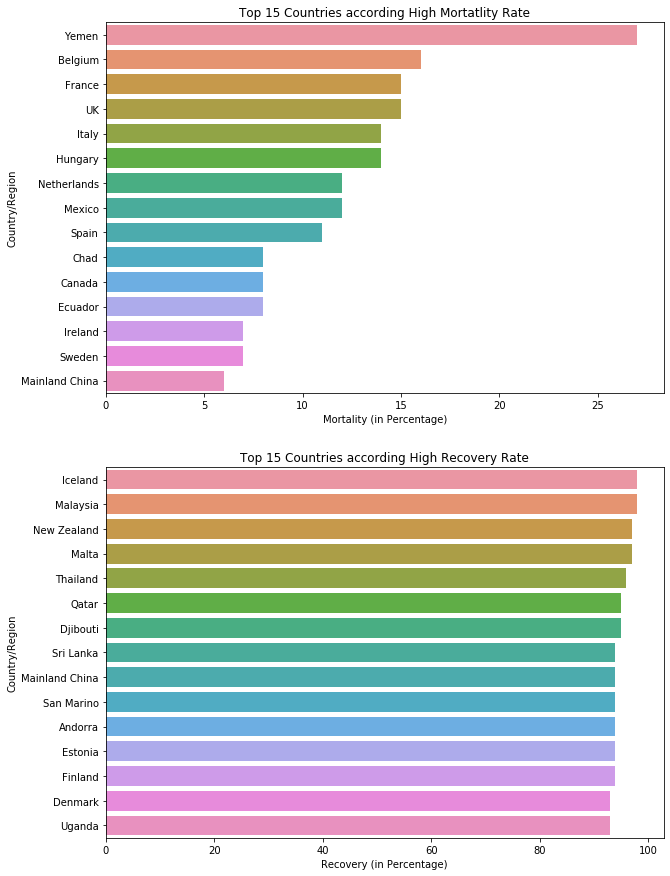

In [147]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
seaborn.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovered"],ascending=False).head(15)
seaborn.barplot(x=countrywise_plot_recover["Recovered"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")


Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

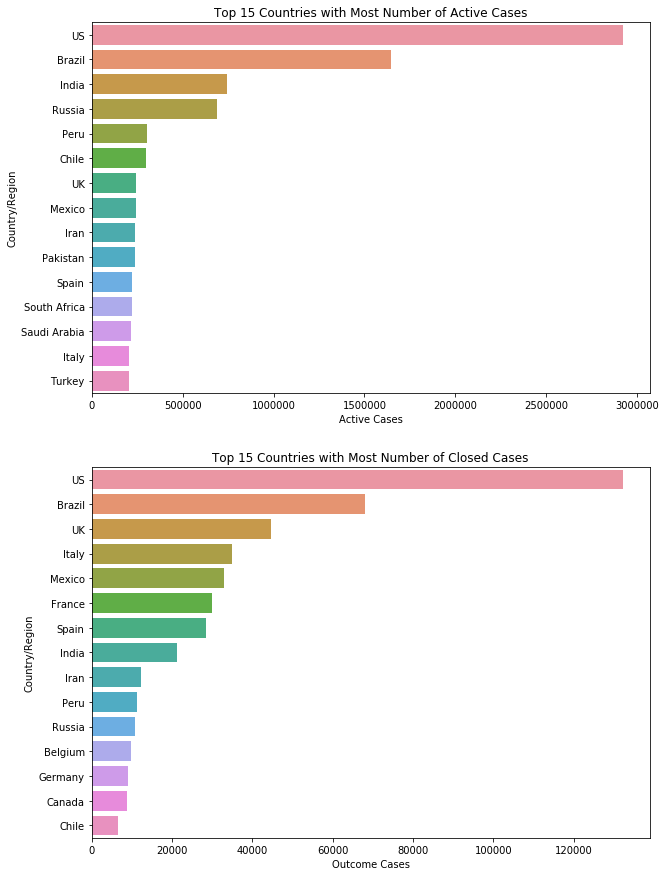

In [148]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
seaborn.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
seaborn.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

Mean Survival Probability across all countries 96.7593871621193
Median Survival Probability across all countries 97.85703352211848
Mean Death Probability across all countries 3.240612837880704
Median Death Probability across all countries 2.142966477881515


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

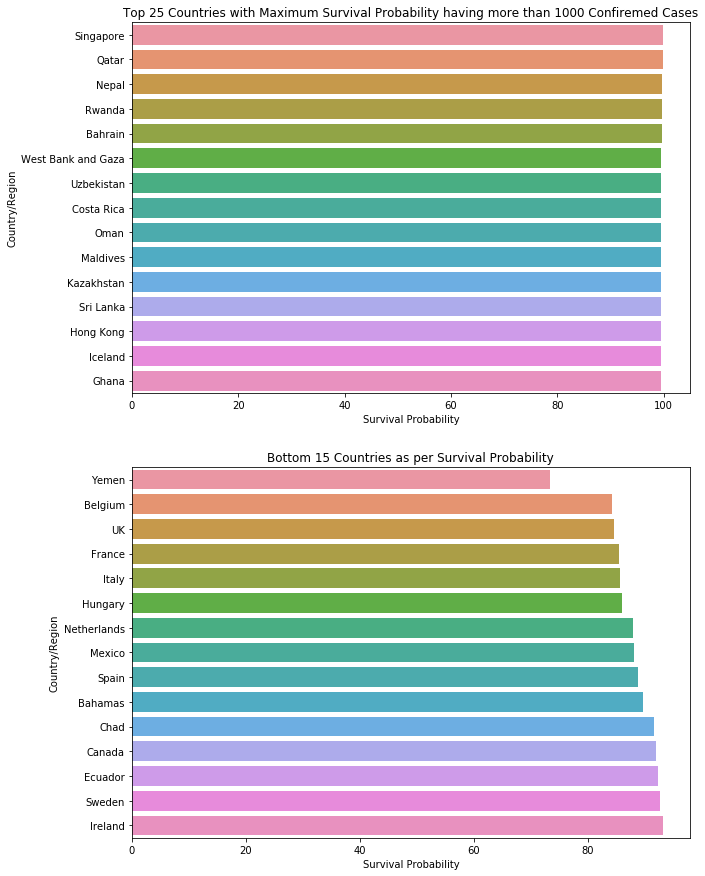

In [149]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
seaborn.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
seaborn.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")